<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
X = df[col_names]
y = df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
clf=DecisionTreeClassifier( max_depth=2)
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7272727272727273
Recall: 0.2972972972972973
Precision: 0.6666666666666666


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

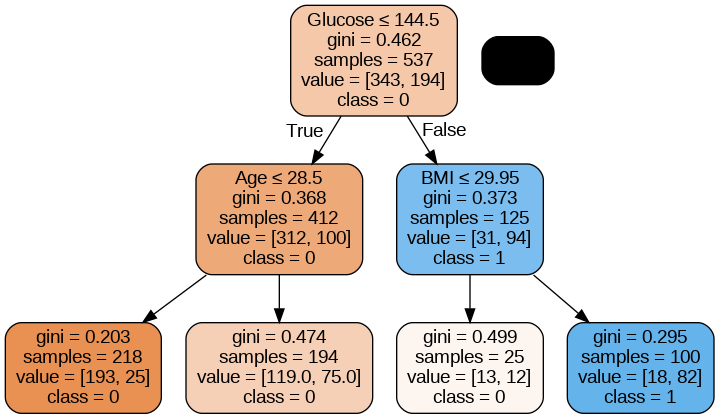

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7792207792207793
Recall: 0.5540540540540541
Precision: 0.6949152542372882


In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=4,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7748917748917749
Recall: 0.5
Precision: 0.7115384615384616


In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7748917748917749
Recall: 0.5675675675675675
Precision: 0.6774193548387096


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
for model in [model1, model2, model3]:
  model.fit(x_train, y_train)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)


In [ ]:
preds = np.array([pred1, pred2, pred3])
max_vote_preds, _ = mode(preds, axis=0)
max_vote_preds = max_vote_preds.flatten()

In [ ]:
prob1 = model1.predict_proba(x_test)
prob2 = model2.predict_proba(x_test)
prob3 = model3.predict_proba(x_test)

In [ ]:
avg_probs = (prob1 + prob2 + prob3) / 3
avg_vote_preds = np.argmax(avg_probs, axis=1)

In [ ]:
acc1 = model1.score(x_train, y_train)
acc2 = model2.score(x_train, y_train)
acc3 = model3.score(x_train, y_train)

In [ ]:
weights = np.array([acc1, acc2, acc3])
weighted_probs = (prob1 * weights[0] + prob2 * weights[1] + prob3 * weights[2]) / np.sum(weights)
weighted_vote_preds = np.argmax(weighted_probs, axis=1)

In [ ]:
print("\nBase Model Accuracies:")
print("Logistic Regression:", accuracy_score(y_test, pred1))
print("Decision Tree:", accuracy_score(y_test, pred2))
print("KNN:", accuracy_score(y_test, pred3))



Base Model Accuracies:
Logistic Regression: 0.7792207792207793
Decision Tree: 0.7445887445887446
KNN: 0.7489177489177489


In [ ]:
print("\nEnsemble Accuracies:")
print("Max Voting:", accuracy_score(y_test, max_vote_preds))
print("Average Voting:", accuracy_score(y_test, avg_vote_preds))
print("Weighted Voting:", accuracy_score(y_test, weighted_vote_preds))


Ensemble Accuracies:
Max Voting: 0.7835497835497836
Average Voting: 0.7878787878787878
Weighted Voting: 0.7835497835497836


In [ ]:
print("\nClassification Report (Weighted Voting):")
print(classification_report(y_test, weighted_vote_preds))


Classification Report (Weighted Voting):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.67      0.64      0.65        74

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [ ]:
log_clf = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
hard_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='hard')


In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='soft'
)

In [ ]:
hard_voting_clf.fit(x_train, y_train)
soft_voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
y_pred_hard = hard_voting_clf.predict(x_test)
y_pred_soft = soft_voting_clf.predict(x_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

print("\nClassification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))

Hard Voting Accuracy: 0.7835497835497836
Soft Voting Accuracy: 0.7878787878787878

Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       157
           1       0.68      0.64      0.66        74

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.79      0.79       231



In [ ]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(x_train, y_train)
y_pred1 = rf1.predict(x_test)
print("Experiment 1: Default Parameters")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print()

Experiment 1: Default Parameters
Accuracy: 0.7792207792207793



In [ ]:
rf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf2.fit(x_train, y_train)
y_pred2 = rf2.predict(x_test)
print("Experiment 2: n_estimators = 200")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print()

Experiment 2: n_estimators = 200
Accuracy: 0.7748917748917749



In [ ]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf3.fit(x_train, y_train)
y_pred3 = rf3.predict(x_test)
print("Experiment 3: max_depth = 3")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print()


Experiment 3: max_depth = 3
Accuracy: 0.7705627705627706



In [ ]:
rf4 = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
rf4.fit(x_train, y_train)
y_pred4 = rf4.predict(x_test)
print("Experiment 4: n_estimators = 300, max_depth = 5")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print()

Experiment 4: n_estimators = 300, max_depth = 5
Accuracy: 0.7748917748917749



In [ ]:
results = pd.DataFrame({
    'Experiment': ['Default', 'n_estimators=200', 'max_depth=3', 'n_estimators=300, max_depth=5'],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4)
    ]
})

print("Comparison Summary:")
print(results)

Comparison Summary:
                      Experiment  Accuracy
0                        Default  0.779221
1               n_estimators=200  0.774892
2                    max_depth=3  0.770563
3  n_estimators=300, max_depth=5  0.774892


In [ ]:
df1=pd.read_csv('/content/Concrete Compressive Strength.csv')
df1.shape

(1030, 9)

In [ ]:
[col for col in df1.columns if df1[col].isnull().sum()>0]

[]

In [ ]:
df1.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [ ]:
X_0 = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
        'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']]

y_0 = df['Concrete compressive strength ']


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf1 = RandomForestRegressor(n_estimators=1000,oob_score=True, random_state=42,bootstrap=True)
rf1.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred1 = rf1.predict(X_test1)

print("Experiment 1: n_estimators = 100")
print(f"OOB Score: {rf1.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test1, y_pred1):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test1, y_pred1)):.4f}")
print()

Experiment 1: n_estimators = 100
OOB Score: 0.9162
Test R² Score: 0.8810
Test RMSE: 5.5378



In [ ]:
rf2 = RandomForestRegressor(n_estimators=300,oob_score=True,random_state=42,bootstrap=True)
rf2.fit(X_train1, y_train1)
y_pred2 = rf2.predict(X_test1)

print("Experiment 2: n_estimators = 300")
print(f"OOB Score: {rf2.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test1, y_pred2):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test1, y_pred2)):.4f}")
print()

Experiment 2: n_estimators = 300
OOB Score: 0.9165
Test R² Score: 0.8794
Test RMSE: 5.5746



In [ ]:
rf3 = RandomForestRegressor( n_estimators=20,oob_score=True,random_state=42,bootstrap=True)
rf3.fit(X_train1, y_train1)
y_pred3 = rf3.predict(X_test1)

print("Experiment 3: n_estimators = 20")
print(f"OOB Score: {rf3.oob_score_:.4f}")
print(f"Test R² Score: {r2_score(y_test1, y_pred3):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test1, y_pred3)):.4f}")
print()

Experiment 3: n_estimators = 20
OOB Score: 0.8930
Test R² Score: 0.8788
Test RMSE: 5.5889



In [ ]:
results = pd.DataFrame({'n_estimators': [20, 100, 300],'OOB_Score': [rf3.oob_score_, rf1.oob_score_, rf2.oob_score_],'Test_R2': [
        r2_score(y_test1, y_pred3),
        r2_score(y_test1, y_pred1),
        r2_score(y_test1, y_pred2)
    ]
})

print("Comparison Summary:")
print(results)

Comparison Summary:
   n_estimators  OOB_Score   Test_R2
0            20   0.893018  0.878780
1           100   0.916200  0.880989
2           300   0.916482  0.879402


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train1, y_train1)
y_pred_h = gb_reg.predict(X_test1)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred_h))
print(f"Gradient Boosting (Regression) RMSE: {rmse:.4f}")

Gradient Boosting (Regression) RMSE: 4.9942


In [ ]:
df2=pd.read_csv("/content/breast-cancer.csv")
df2.shape

(569, 32)

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor


In [ ]:
df2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

[]

In [ ]:
df2.columns = df2.columns.str.strip().str.replace(' ', '_').str.lower()

In [ ]:
df2['diagnosis'] = df2['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
X_1 = df2.drop(columns=['diagnosis'])
y_1= df2['diagnosis']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(X_train2, y_train2)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [ ]:
y_pred_ada = ada.predict(X_test2)

In [ ]:
ada_acc = accuracy_score(y_test2, y_pred_ada)
print(f"AdaBoost Accuracy: {ada_acc:.4f}")

AdaBoost Accuracy: 0.9649


In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train2, y_train2)
y_pred_gb = gb_clf.predict(X_test2)
gb_acc = accuracy_score(y_test2, y_pred_gb)
print(f"Gradient Boosting (Classification) Accuracy: {gb_acc:.4f}")

Gradient Boosting (Classification) Accuracy: 0.9474


In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train2, y_train2)
y_pred_xgb = xgb.predict(X_test2)
xgb_acc = accuracy_score(y_test2, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:25:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
cat = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat.fit(X_train2, y_train2)
y_pred_cat = cat.predict(X_test2)
cat_acc = accuracy_score(y_test2, y_pred_cat)
print(f"CatBoost Accuracy: {cat_acc:.4f}")

CatBoost Accuracy: 0.9649


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import time

In [ ]:

results = []
def evaluate_model(name, model):
    start_time = time.time()
    model.fit(X_train2, y_train2)
    end_time = time.time()

    y_pred = model.predict(X_test2)
    acc = accuracy_score(y_test2, y_pred)
    train_time = end_time - start_time

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Training Time (s)': train_time
    })
    print(f"{name} -> Accuracy: {acc:.4f}, Time: {train_time:.3f}s")


In [ ]:
bag1 = BaggingClassifier(n_estimators=100, random_state=42)
evaluate_model("Bagging", bag1)

Bagging -> Accuracy: 0.9561, Time: 0.868s


In [ ]:
rf4 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
evaluate_model("Random Forest", rf4)


Random Forest -> Accuracy: 0.9649, Time: 0.573s


In [ ]:
ada1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
evaluate_model("AdaBoost", ada1)


AdaBoost -> Accuracy: 0.9649, Time: 0.432s


In [ ]:
xgb1 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
evaluate_model("XGBoost", xgb1)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost -> Accuracy: 0.9561, Time: 1.854s


In [ ]:
cat1 = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
evaluate_model("CatBoost", cat1)


CatBoost -> Accuracy: 0.9649, Time: 2.772s


In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train2)
X_test_scaled = sc.transform(X_test2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)

In [ ]:
voting_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)
voting_hard.fit(X_train_scaled, y_train2)
y_pred_hard = voting_hard.predict(X_test_scaled)
acc_hard = accuracy_score(y_test2, y_pred_hard)


In [ ]:
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)
voting_soft.fit(X_train_scaled, y_train2)
y_pred_soft = voting_soft.predict(X_test_scaled)
acc_soft = accuracy_score(y_test2, y_pred_soft)

In [ ]:
rf6 = RandomForestClassifier(n_estimators=100, random_state=42)
rf6.fit(X_train2, y_train2)
y_pred_rf = rf6.predict(X_test2)
acc_rf = accuracy_score(y_test2, y_pred_rf)

In [ ]:
ada2 = AdaBoostClassifier(n_estimators=100, random_state=42)
ada2.fit(X_train2, y_train2)
y_pred_ada = ada.predict(X_test2)
acc_ada = accuracy_score(y_test2, y_pred_ada)

bag = BaggingClassifier(n_estimators=100, random_state=42)
bag.fit(X_train2, y_train2)
y_pred_bag = bag.predict(X_test2)
acc_bag = accuracy_score(y_test2, y_pred_bag)

In [ ]:
print("Ensemble Model Comparison (Accuracy):")
print(f"Heterogeneous Voting (Hard)     : {acc_hard:.4f}")
print(f"Heterogeneous Voting (Soft)     : {acc_soft:.4f}")
print(f"Random Forest (Homogeneous)     : {acc_rf:.4f}")
print(f"AdaBoost (Homogeneous)          : {acc_ada:.4f}")
print(f"Bagging (Homogeneous)           : {acc_bag:.4f}")

Ensemble Model Comparison (Accuracy):
Heterogeneous Voting (Hard)     : 0.9825
Heterogeneous Voting (Soft)     : 0.9737
Random Forest (Homogeneous)     : 0.9649
AdaBoost (Homogeneous)          : 0.9649
Bagging (Homogeneous)           : 0.9561


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

In [ ]:
homogeneous_models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

homogeneous_results = {}
for name, model in homogeneous_models.items():
    start = time.time()
    model.fit(X_train2, y_train2)
    end = time.time()
    y_pred = model.predict(X_test2)
    homogeneous_results[name] = {"accuracy": accuracy_score(y_test, y_pred), "time": end-start}

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)

heterogeneous_models = {
    "Voting (Hard)": VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)], voting='hard'),
    "Voting (Soft)": VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)], voting='soft'),
    "Stacking": StackingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)], final_estimator=LogisticRegression(), passthrough=True)
}

heterogeneous_results = {}
for name, model in heterogeneous_models.items():
    start = time.time()
    model.fit(X_train_scaled, y_train2)
    end = time.time()
    y_pred = model.predict(X_test_scaled)
    heterogeneous_results[name] = {"accuracy": accuracy_score(y_test2, y_pred), "time": end-start}

print("=== Homogeneous Ensembles ===")
for k,v in homogeneous_results.items():
    print(f"{k}: Accuracy={v['accuracy']:.4f}, Training Time={v['time']:.3f}s")

print("\n=== Heterogeneous Ensembles ===")
for k,v in heterogeneous_results.items():
    print(f"{k}: Accuracy={v['accuracy']:.4f}, Training Time={v['time']:.3f}s")

=== Homogeneous Ensembles ===
Bagging: Accuracy=0.9561, Training Time=0.825s
Random Forest: Accuracy=0.9649, Training Time=0.271s
AdaBoost: Accuracy=0.9737, Training Time=0.421s

=== Heterogeneous Ensembles ===
Voting (Hard): Accuracy=0.9825, Training Time=0.050s
Voting (Soft): Accuracy=0.9737, Training Time=0.056s
Stacking: Accuracy=0.9737, Training Time=0.313s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:18:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


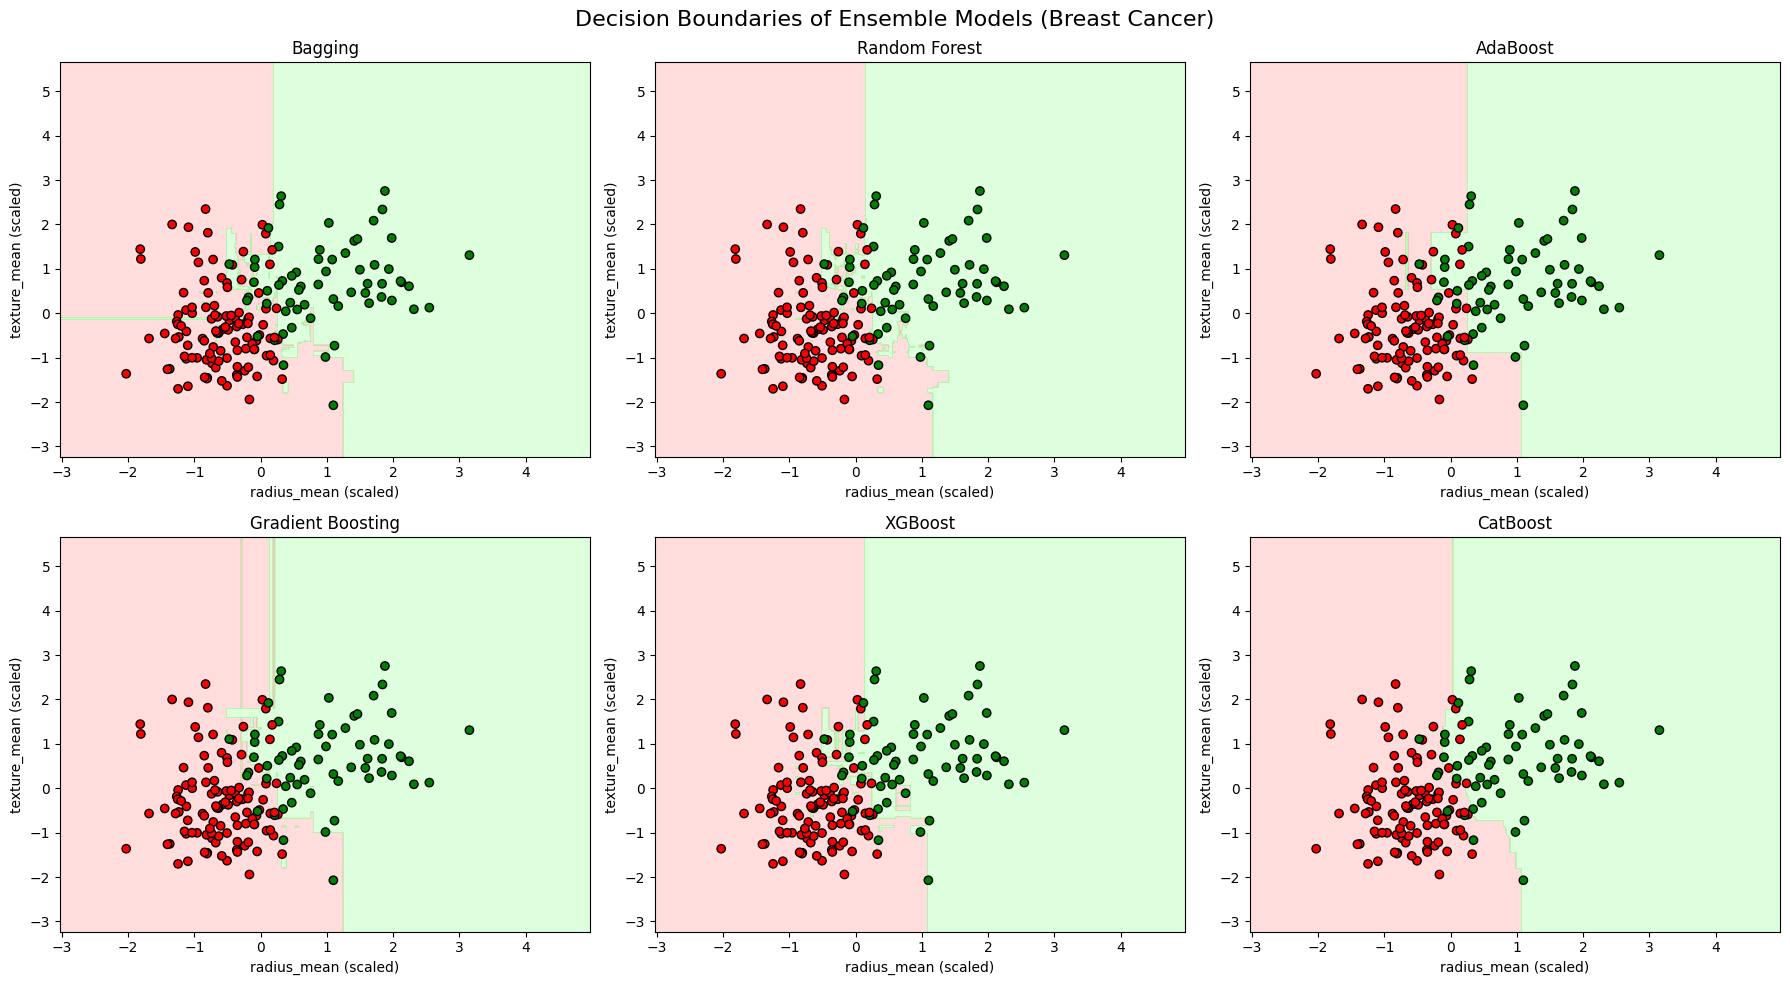

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

if not isinstance(X_1, pd.DataFrame):
    X_1 = pd.DataFrame(X_1)

feature_names = X_1.columns
X_vis = X_1[['radius_mean', 'texture_mean']].values
y_vis = np.array(y_1)

sc = StandardScaler()
X_vis_scaled = sc.fit_transform(X_vis)
x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)

models = {
    'Bagging': BaggingClassifier(n_estimators=50, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(iterations=50, learning_rate=0.1, depth=4, verbose=0, random_state=42)
}

plt.figure(figsize=(18, 10))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train_v, y_train_v)
    x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
    y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(x_test_v[:, 0], x_test_v[:, 1], c=y_test_v, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    plt.title(name)
    plt.xlabel('radius_mean (scaled)')
    plt.ylabel('texture_mean (scaled)')

plt.suptitle("Decision Boundaries of Ensemble Models (Breast Cancer)", fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:17:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


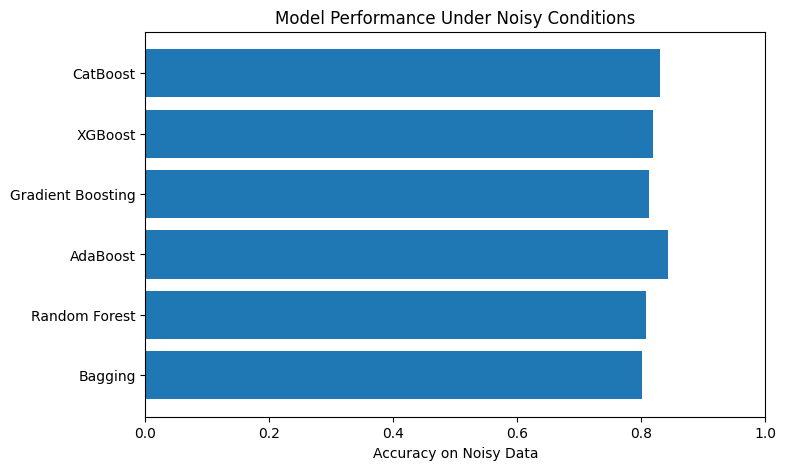

In [ ]:
np.random.seed(42)
X_noisy = X_vis_scaled + np.random.normal(0, 0.5, X_vis_scaled.shape)
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y_vis, test_size=0.3, random_state=42)

acc_scores = {}
for name, model in models.items():
    model.fit(x_train_n, y_train_n)
    y_pred = model.predict(x_test_n)
    acc_scores[name] = accuracy_score(y_test_n, y_pred)

plt.figure(figsize=(8, 5))
plt.barh(list(acc_scores.keys()), list(acc_scores.values()))
plt.xlabel("Accuracy on Noisy Data")
plt.title("Model Performance Under Noisy Conditions")
plt.xlim(0, 1)
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:18:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


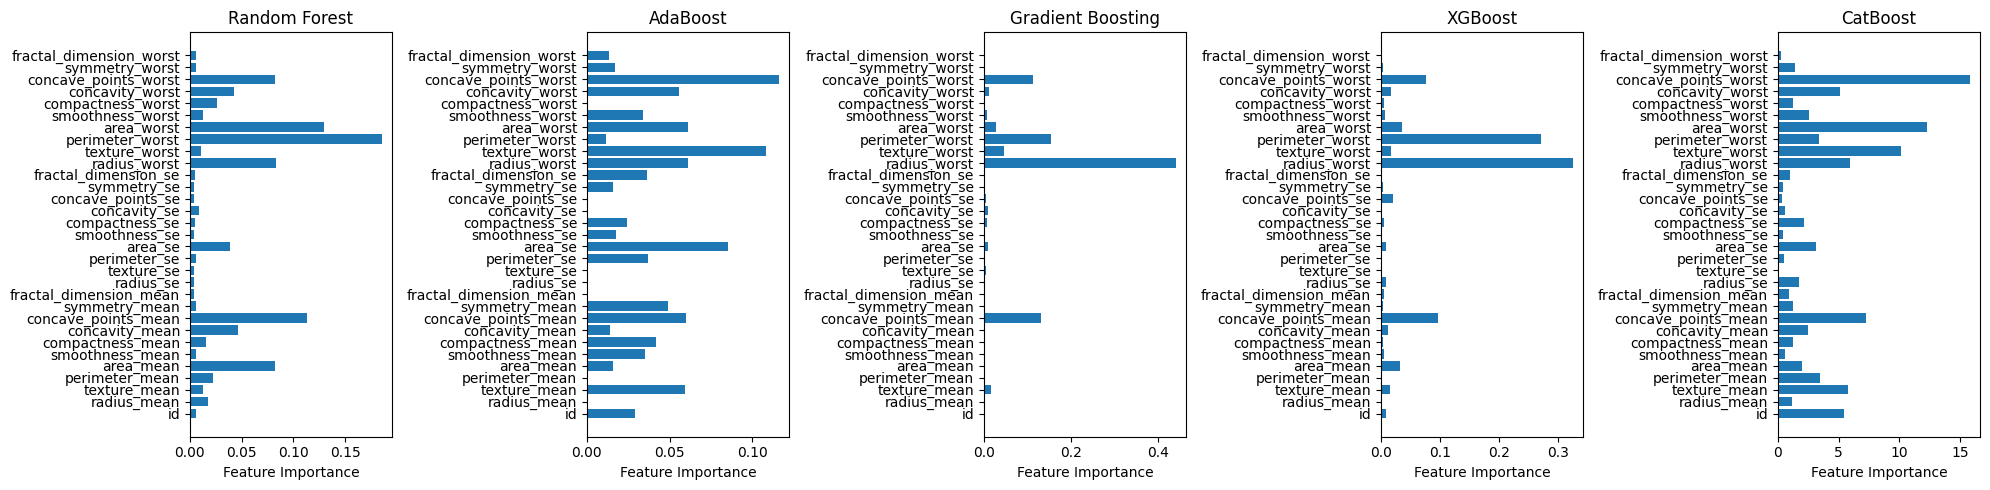

In [ ]:
importances = {}
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        model.fit(X_1, y_1)
        importances[name] = model.feature_importances_

fig, axes = plt.subplots(1, len(importances), figsize=(20, 5))
for ax, (name, imp) in zip(axes, importances.items()):
    ax.barh(feature_names, imp)
    ax.set_title(name)
    ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()